In [37]:
# BASICS
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# HELPER FUNCTIONS
import my_resample as ms
import my_functions as mf
from sklearn.metrics import make_scorer

# METRICS
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# CLASSIFIERS
from sklearn.ensemble import RandomForestRegressor

# GRID SEARCHING
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# Some Helpful Functions 

In [40]:
# CREATE FUNCTION
def gridsearching(model, grid):

    search = GridSearchCV(model, param_grid=grid, scoring=custom_score)
    search.fit(X_train, y_train)

    df = pd.DataFrame(search.cv_results_)
    df = df.drop(['params'], axis=1)
    
    return df

def plot_line(df, param):
    plt.plot(df.iloc[:,4], df.mean_train_score)
    plt.plot(df.iloc[:,4], df.mean_test_score)

    plt.xlabel(param)
    plt.ylabel("score")
    
    plt.show()
    
def plot_bar(df, param, w=1, rotate=False):
    plt.bar(df.iloc[:,4], df.mean_train_score, width=w, yerr=df.std_train_score)
    plt.bar(df.iloc[:,4], df.mean_test_score, width=w, yerr=df.std_train_score)

    plt.xlabel(param)
    plt.ylabel("score")
    if rotate: 
        plt.xticks(rotation=70)

    plt.show()

In [48]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
def my_custom_loss_func(ground_truth, predictions):
    predictions = [1 if x>1 else 0 for x in predictions]
    return f1_score(ground_truth, predictions)

custom_scorer = make_scorer(my_custom_loss_func, greater_is_better=True)


grid = GridSearchCV(RandomForestRegressor(), param_grid={'n_estimators': range(1, 102, 20)}, scoring=custom_scorer)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(1, 102, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(my_custom_loss_func), verbose=0)

In [51]:
df = pd.DataFrame(grid.cv_results_)

In [53]:
df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.103926,0.007153,0.0,0.0,1,{'n_estimators': 1},1,0.0,0.0,0.0,0.0,0.0,0.0,0.006972,0.003756,0.0,0.0
1,1.896069,0.008958,0.0,0.0,21,{'n_estimators': 21},1,0.0,0.0,0.0,0.0,0.0,0.0,0.059911,0.000134,0.0,0.0
2,3.712756,0.014977,0.0,0.0,41,{'n_estimators': 41},1,0.0,0.0,0.0,0.0,0.0,0.0,0.133188,0.001222,0.0,0.0
3,5.577998,0.020922,0.0,0.0,61,{'n_estimators': 61},1,0.0,0.0,0.0,0.0,0.0,0.0,0.232428,0.001161,0.0,0.0
4,7.326503,0.025286,0.0,0.0,81,{'n_estimators': 81},1,0.0,0.0,0.0,0.0,0.0,0.0,0.271262,0.000095,0.0,0.0
5,9.111738,0.031152,0.0,0.0,101,{'n_estimators': 101},1,0.0,0.0,0.0,0.0,0.0,0.0,0.390133,0.000479,0.0,0.0


In [45]:
>>> from sklearn.metrics import fbeta_score, make_scorer
>>> ftwo_scorer = make_scorer(fbeta_score, beta=2)
>>> ftwo_scorer
make_scorer(fbeta_score, beta=2)
>>> from sklearn.model_selection import GridSearchCV
>>> from sklearn.svm import LinearSVC
>>> grid = GridSearchCV(LinearSVC(), param_grid={'C': [1, 10]},
...                     scoring=ftwo_scorer)

SyntaxError: invalid syntax (<ipython-input-45-bc52e35b70d8>, line 1)

In [35]:
print(my_custom_loss_func([1, 1, 0, 0], [1, 5, 1, 1]))
print(f1_score([1, 1, 0, 0],[0, 1, 0, 0]))

0.666666666667
0.666666666667


# Create Dict to Hold Dataframse

In [3]:
# emperor dictionary
ed = {}

# Read Data

In [49]:
data_file_path = "/Users/gandalf/Documents/coding/Galvanize/MatchingService/data/"
website_file_path = '/Users/gandalf/Documents/coding/rczyrnik.github.io/capstone/'

X_train = np.load(data_file_path+'X_train_reg.npy')
X_test = np.load(data_file_path+'X_test_reg.npy')
y_train = np.load(data_file_path+'y_train_reg.npy')
y_train = [1 if x>1 else 0 for x in y_train]
y_test = np.load(data_file_path+'y_test_reg.npy')
y_test = [1 if x>1 else 0 for x in y_test]
cols = np.load(data_file_path+'cols.npy')

# n_estimators

In [42]:
%%time

parameter = "n_estimators"
values = range(1, 102, 10)     # default 10

ed[parameter] = gridsearching(
        RandomForestRegressor(),              # Our model
        {parameter: values}                   # Values for that parameter
)

plot_line(ed[parameter], parameter) 

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

# criterion

In [ ]:
# causes trouble

%%time

parameter = "criterion"
values = ['mse',  'mae']     # default mse

ed[parameter] = gridsearching(
        RandomForestRegressor(),              # Our model
        parameter,                            # Parameter to look at
        {parameter: values}                   # Values for that parameter
)

plot_line(ed[parameter], parameter)  

# max_features

In [ ]:
%%time

parameter = "max_features"
values = np.arange(.1, 1.1, .2)       # default 1

ed[parameter] = gridsearching(
        RandomForestRegressor(),              # Our model
        {parameter: values}                   # Values for that parameter
)

plot_line(ed[parameter], parameter)  

# max_depth

In [5]:
parameter = "max_depth"
values = np.arange(1, 102, 10),       # default None

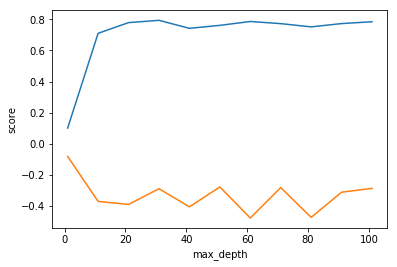

CPU times: user 38.6 s, sys: 360 ms, total: 39 s
Wall time: 40 s


In [10]:
%%time

search = GridSearchCV(RandomForestRegressor(), param_grid={"max_depth":np.arange(1, 102, 10)})
search.fit(X_train, y_train)

df = pd.DataFrame(search.cv_results_)
df = df.drop(['params'], axis=1)
ed[parameter] = df
plot_line(ed[parameter], parameter)  

# min_samples_split

In [15]:
parameter = "min_samples_split"
values = np.arange(1, 20),       # default 1

In [17]:
%%time

search = GridSearchCV(RandomForestRegressor(), param_grid={"min_samples_split":np.arange(2, 20)})
search.fit(X_train, y_train)

CPU times: user 1min 12s, sys: 459 ms, total: 1min 13s
Wall time: 1min 14s


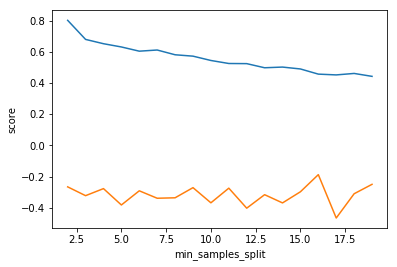

In [18]:
ed[parameter] = pd.DataFrame(search.cv_results_).drop(['params'], axis=1)
plot_line(ed[parameter], parameter)  

# min_samples_leaf

In [28]:
parameter = "min_samples_leaf"
values = np.arange(0, 20, 2),       # default 0

In [29]:
%%time

search = GridSearchCV(RandomForestRegressor(), param_grid={"min_samples_leaf":np.arange(0, 20, 2)})
search.fit(X_train, y_train)

ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0

In [30]:
ed[parameter] = pd.DataFrame(search.cv_results_).drop(['params'], axis=1)
plot_line(ed[parameter], parameter)  

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

# max_leaf_nodes

In [ ]:
parameter = "max_leaf_nodes"
values = np.arange(200, 600, 20),       # default None

In [21]:
%%time

search = GridSearchCV(RandomForestRegressor(), param_grid={"max_leaf_nodes":np.arange(200, 600, 20)})
search.fit(X_train, y_train)

CPU times: user 1min 19s, sys: 599 ms, total: 1min 20s
Wall time: 1min 23s


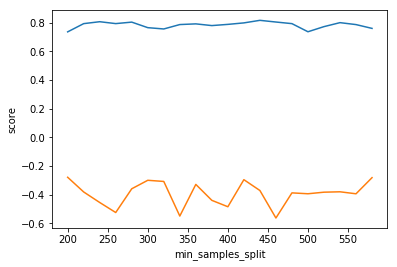

In [22]:
ed[parameter] = pd.DataFrame(search.cv_results_).drop(['params'], axis=1)
plot_line(ed[parameter], parameter)  

# min_impurity_decrease

In [23]:
parameter = "min_impurity_decrease"
values = np.arange(0, .0001, .00001),       # default 0

In [24]:
%%time

search = GridSearchCV(RandomForestRegressor(), param_grid={"min_impurity_decrease":np.arange(0, .0001, .00001)})
search.fit(X_train, y_train)

CPU times: user 46.2 s, sys: 494 ms, total: 46.7 s
Wall time: 52.1 s


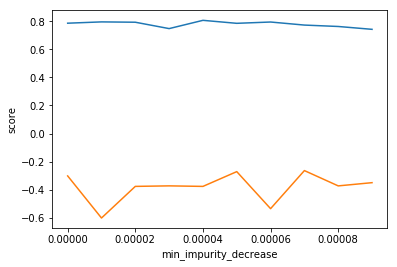

In [25]:
ed[parameter] = pd.DataFrame(search.cv_results_).drop(['params'], axis=1)
plot_line(ed[parameter], parameter)  

# class_weight

In [ ]:
parameter = "class_weight"
values = [{0:n, 1:1-n} for n in np.arange(.1, 1, .1)],       # default 0


In [ ]:
%%time

search = GridSearchCV(RandomForestRegressor(), param_grid={"class_weight":[{0:n, 1:1-n} for n in np.arange(.1, 1, .1)]})
search.fit(X_train, y_train)

In [ ]:
ed[parameter] = pd.DataFrame(search.cv_results_).drop(['params'], axis=1)
plot_line(ed[parameter], parameter)  